# **Intro to SVM**

SVM offers very high accuracy compared to other classifiers such as logistic regression, and decision trees. 

It is known for its kernel trick to handle nonlinear input spaces. 

It is used in a variety of applications such as face detection, intrusion detection, classification of emails, news articles and web pages, classification of genes, and handwriting recognition

SVM is an exciting algorithm and the concepts are relatively simple. 

The classifier separates data points using a hyperplane with the largest amount of margin. 

That's why an SVM classifier is also known as a discriminative classifier. 

SVM finds an optimal hyperplane which helps in classifying new data points.

# Support Vector Machines

Generally, Support Vector Machines is considered to be a classification approach, it but can be employed in both types of classification and regression problems. 

It can easily handle multiple continuous and categorical variables. 

SVM constructs a hyperplane in multidimensional space to separate different classes. 

SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. 

The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.

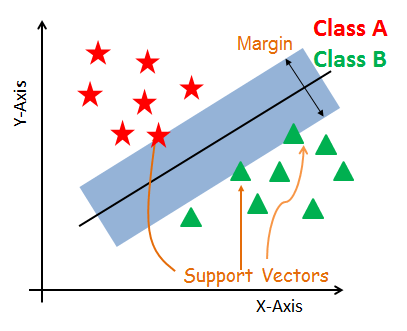

Support Vectors

Support vectors are the data points, which are closest to the hyperplane. 

These points will define the separating line better by calculating margins. 

These points are more relevant to the construction of the classifier.

Hyperplane

A hyperplane is a decision plane which separates between a set of objects having different class memberships.

Margin

A margin is a gap between the two lines on the closest class points. 

This is calculated as the perpendicular distance from the line to support vectors or closest points. 

If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.

The main objective is to segregate the given dataset in the best possible way. 

The distance between the either nearest points is known as the margin. 

The objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. 

SVM searches for the maximum marginal hyperplane in the following steps:

Generate hyperplanes which segregates the classes in the best way. 

First figure showing three hyperplanes black, blue and orange. 

Here, the blue and orange have higher classification error, but the black is separating the two classes correctly.

Select the right hyperplane with the maximum segregation from the either nearest data points as shown in the second figure

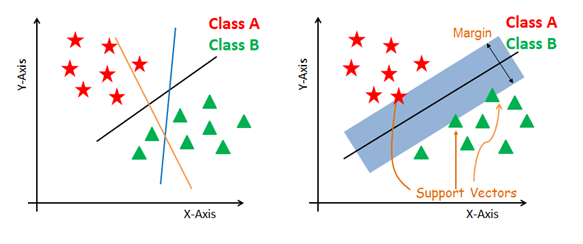

Dealing with non-linear and inseparable planes

Some problems can’t be solved using linear hyperplane, as shown in the figure below (left-hand side).

In such situation, SVM uses a kernel trick to transform the input space to a higher dimensional space as shown on the right.

The data points are plotted on the x-axis and z-axis (Z is the squared sum of both x and y: z=x^2+y^2). 

Now you can easily segregate these points using linear separation.

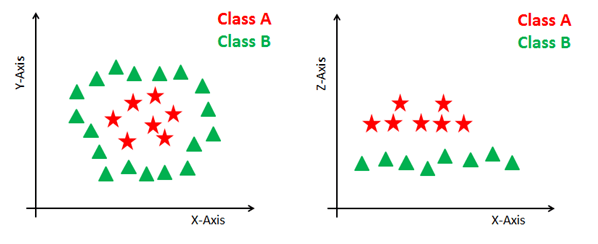

SVM Kernels

The SVM algorithm is implemented in practice using a kernel. 

A kernel transforms an input data space into the required form. SVM uses a technique called the kernel trick. 

Here, the kernel takes a low-dimensional input space and transforms it into a higher dimensional space. 

In other words, you can say that it converts nonseparable problem to separable problems by adding more dimension to it. 

It is most useful in non-linear separation problem. Kernel trick helps you to build a more accurate classifier.

Linear Kernel 

A linear kernel can be used as normal dot product any two given observations. 

The product between two vectors is the sum of the multiplication of each pair of input values.

K(x, xi) = sum(x * xi)

Polynomial Kernel 

A polynomial kernel is a more generalized form of the linear kernel. 

The polynomial kernel can distinguish curved or nonlinear input space.

K(x,xi) = 1 + sum(x * xi)^d

Where d is the degree of the polynomial. d=1 is similar to the linear transformation. 

The degree needs to be manually specified in the learning algorithm.

Radial Basis Function Kernel 

The Radial basis function kernel is a popular kernel function commonly used in support vector machine classification. 

RBF can map an input space in infinite dimensional space.

K(x,xi) = exp(-gamma * sum((x – xi^2))

Here gamma is a parameter, which ranges from 0 to 1.

A higher value of gamma will perfectly fit the training dataset, which causes over-fitting. 

Gamma=0.1 is considered to be a good default value. 

The value of gamma needs to be manually specified in the learning algorithm.


Classifier Building in Scikit-learn

Until now, you have learned about the theoretical background of SVM. 

Now you will learn about its implementation in Python using scikit-learn.

In the model the building part, you can use the cancer dataset, which is a very famous multi-class classification problem. 

This dataset is computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. 

They describe characteristics of the cell nuclei present in the image.

The dataset comprises 30 features (mean radius, mean texture, mean perimeter, mean area, mean smoothness, mean compactness, mean concavity, mean concave points, mean symmetry, mean fractal dimension, radius error, texture error, perimeter error, area error, smoothness error, compactness error, concavity error, concave points error, symmetry error, fractal dimension error, worst radius, worst texture, worst perimeter, worst area, worst smoothness, worst compactness, worst concavity, worst concave points, worst symmetry, and worst fractal dimension) and a target (type of cancer).

This data has two types of cancer classes: malignant (harmful) and benign (not harmful). 

Here, you can build a model to classify the type of cancer. 

The dataset is available in the scikit-learn library or you can also download it from the UCI Machine Learning Library

In [1]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()

In [2]:
type(cancer)

sklearn.utils.Bunch

In [3]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
print(f"""Feature names: {cancer.feature_names}

----

Target names: {cancer.target_names}""")

Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

----

Target names: ['malignant' 'benign']


In [8]:
# double-check the shapes
print(f"""Feature shape: {cancer.data.shape}

Target shape: {cancer.target.shape}""")

Feature shape: (569, 30)

Target shape: (569,)


Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Split the dataset by using the function train_test_split(). you need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [9]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test

In [10]:
#Import svm model
from sklearn import svm

In [11]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

In [12]:
#Train the model using the training sets
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [13]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [14]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred)

0.9649122807017544

In [15]:
metrics.precision_score(y_test, y_pred)

0.9811320754716981

In [16]:
metrics.recall_score(y_test, y_pred)

0.9629629629629629